In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [80]:
df_jogadores = pd.read_csv('jogadores_rodada_3.csv')

In [81]:
d = {"gol":0,"zag":1,"lat":2,"mei":3,"ata":4}
df_jogadores["Posicao"] = df_jogadores["Posicao"].map(d)

In [82]:
df_jogadores.head()

,Altura,Peso,Desarme,Falta cometida,Cartao amarelo,Cartao vermelho,Falta sofrida,Finalizacao fora,Finalizacao defendida,Finalizacao trave,Gol,Assistencia,Passe Incompleto,Impedimento,Posicao
0,1.83,78.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12.0,1.0,4
1,1.85,76.0,2.0,6.0,1.0,0.0,4.0,4.0,1.0,0.0,0.0,0.0,5.0,2.0,4
2,1.75,66.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,1.85,73.0,4.0,1.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,1.0,7.0,0.0,4
4,1.75,68.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4


In [83]:
#X = df_jogadores.to_numpy()
X = df_jogadores.iloc[:,0:14].values
Y = df_jogadores["Posicao"].values

In [84]:
def descritive(x):
    # calculating descriptives of variable
    min = np.min(x)
    max = x.max()
    ran = x.max()-x.min()
    mean = x.mean()
    median = np.median(x)
    std = x.std()
    skew = sp.stats.skew(x)
    kurt = sp.stats.kurtosis(x)
    x

    # calculating points of standard deviation
    points = mean-std, mean+std

    # plotting the variable with every information
    sns.distplot(x,hist=True, kde=True)
    
    sns.lineplot(points, [0,0], color = 'black', label = "std")
    sns.scatterplot([min,max], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.ylabel('density')
    print(f"std {round(mean-std,2)} {round(mean+std,2)}") 
    print(f"kurtosis {round(kurt,2)}") 
    print(f"skewnees {round(skew,2)}") 
    print(f"range {round(min,2),round(max,2),round(ran,2)}") 
    print(f"mean {round(mean,2)}") 
    print(f"median {round(median,2)}")

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

Verificando a distribuiçao para a caracteristicas com todas as classes juntas
porem com as caracteristicas nao normalizadas.
Muitas das caracteristicas nao seguem uma distribuicao normal,A caracteristica 3 que é o desarme e 7 que é finalizacao para fora é plotada a baixo

std -0.14 4.39
kurtosis 0.88
skewnees 1.21
range (0.0, 10.0, 10.0)
mean 2.13
median 1.0


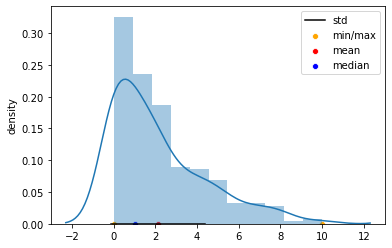

In [93]:
descritive(X[:,3])

std -0.46 1.98
kurtosis 4.89
skewnees 2.13
range (0.0, 6.0, 6.0)
mean 0.76
median 0.0


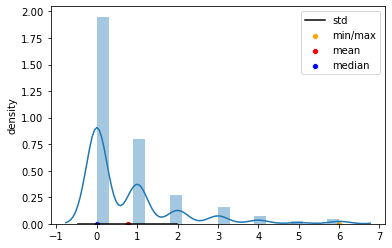

In [92]:
descritive(X[:,7])

Verificando a distribuiçao para a caracteristica altura com todas as classes juntas
porem com as caracteristicas normalizadas

std -1.0 1.0
kurtosis -0.54
skewnees 0.07
range (-2.46, 2.38, 4.84)
mean -0.0
median 0.03


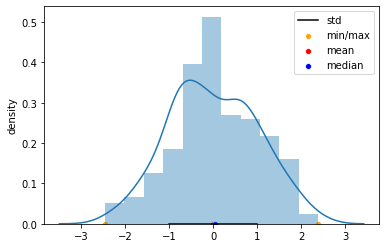

In [72]:
descritive(X_std[:,0])

Verificando a distribuiçao da classe atacante, para a caracteristica altura.
vemos que a curva é aproximadamente normal quando se trata de somente uma classe.
Como os dados foram tratados na etapa de preprocessamento, nao encontramos outliers.
nao assim nao temos atacantes com tamanhos maiores que 1,90 e menores que aproximadamente 1.65
o que de fato poderia acontecer porem nao é muito normal na pratica do esporte

std 1.7 1.83
kurtosis -0.82
skewnees 0.06
range (1.63, 1.91, 0.28)
mean 1.77
median 1.75


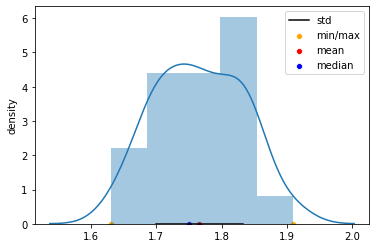

In [95]:
g = df_jogadores[df_jogadores['Posicao'] == 4].iloc[:,0:14].values
descritive(g[:,0])

Covariancia e correlacao das caracteristicas nao normalizadas

In [74]:
cov = np.cov(X.T)
corr = np.corrcoef(X.T)
corr

array([[ 1.        ,  0.76424202, -0.19010965, -0.16102058, -0.04007355,
         0.02177162, -0.25494289, -0.15207354, -0.19592429, -0.00230449,
         0.03288199, -0.15925066,  0.00162475, -0.01922742],
       [ 0.76424202,  1.        , -0.16198649, -0.09453651, -0.01925444,
         0.05895086, -0.16272198, -0.09084768, -0.18172997,  0.06698479,
         0.0289779 , -0.09213796,  0.0693248 ,  0.04683753],
       [-0.19010965, -0.16198649,  1.        ,  0.47662649,  0.10565467,
        -0.0684005 ,  0.3283708 ,  0.28132361,  0.21229737,  0.01110578,
         0.08158322,  0.14528696,  0.43230216, -0.05199909],
       [-0.16102058, -0.09453651,  0.47662649,  1.        ,  0.32201583,
         0.03328237,  0.37825061,  0.39435298,  0.17831703,  0.20789957,
         0.16797486,  0.1879602 ,  0.3054389 ,  0.1963267 ],
       [-0.04007355, -0.01925444,  0.10565467,  0.32201583,  1.        ,
        -0.04707188,  0.21850848,  0.09979489,  0.00448114,  0.03640742,
         0.00476351,  0.09

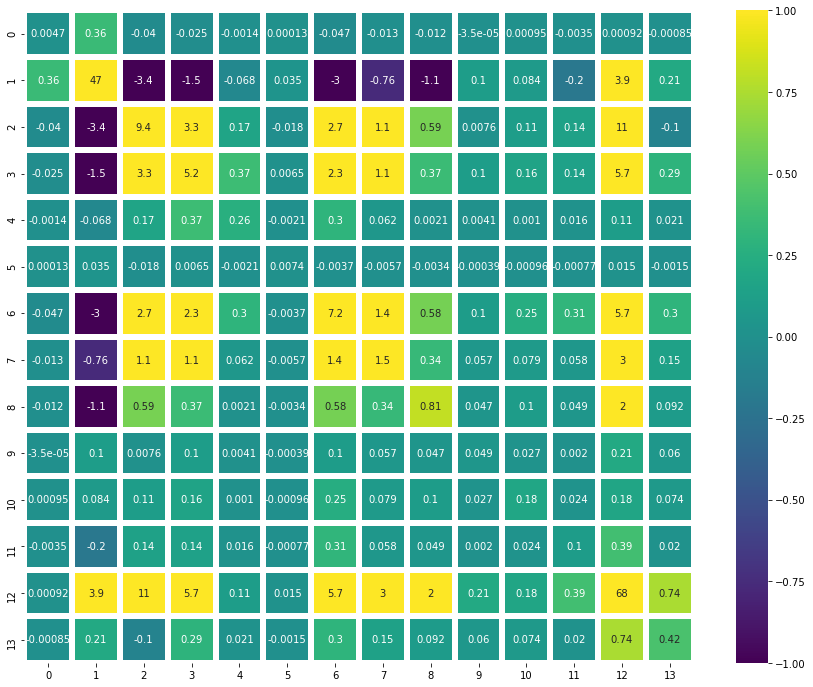

In [77]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,12))     
sns.heatmap(cov, vmin=-1, vmax=1, cmap='viridis',annot=True,linewidths=5,ax=ax)


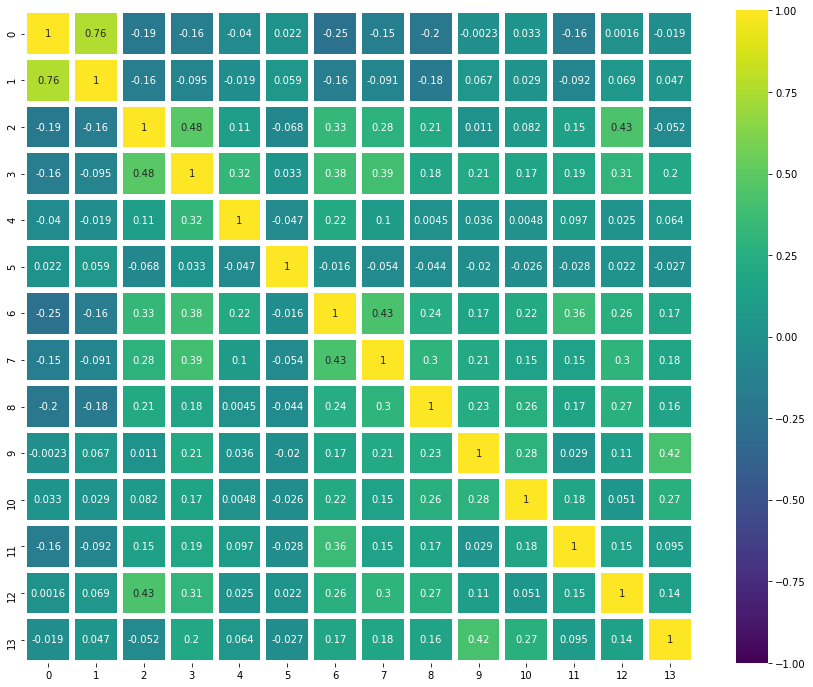

In [78]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,12))     
sns.heatmap(corr, vmin=-1, vmax=1, cmap='viridis',annot=True,linewidths=5,ax=ax)

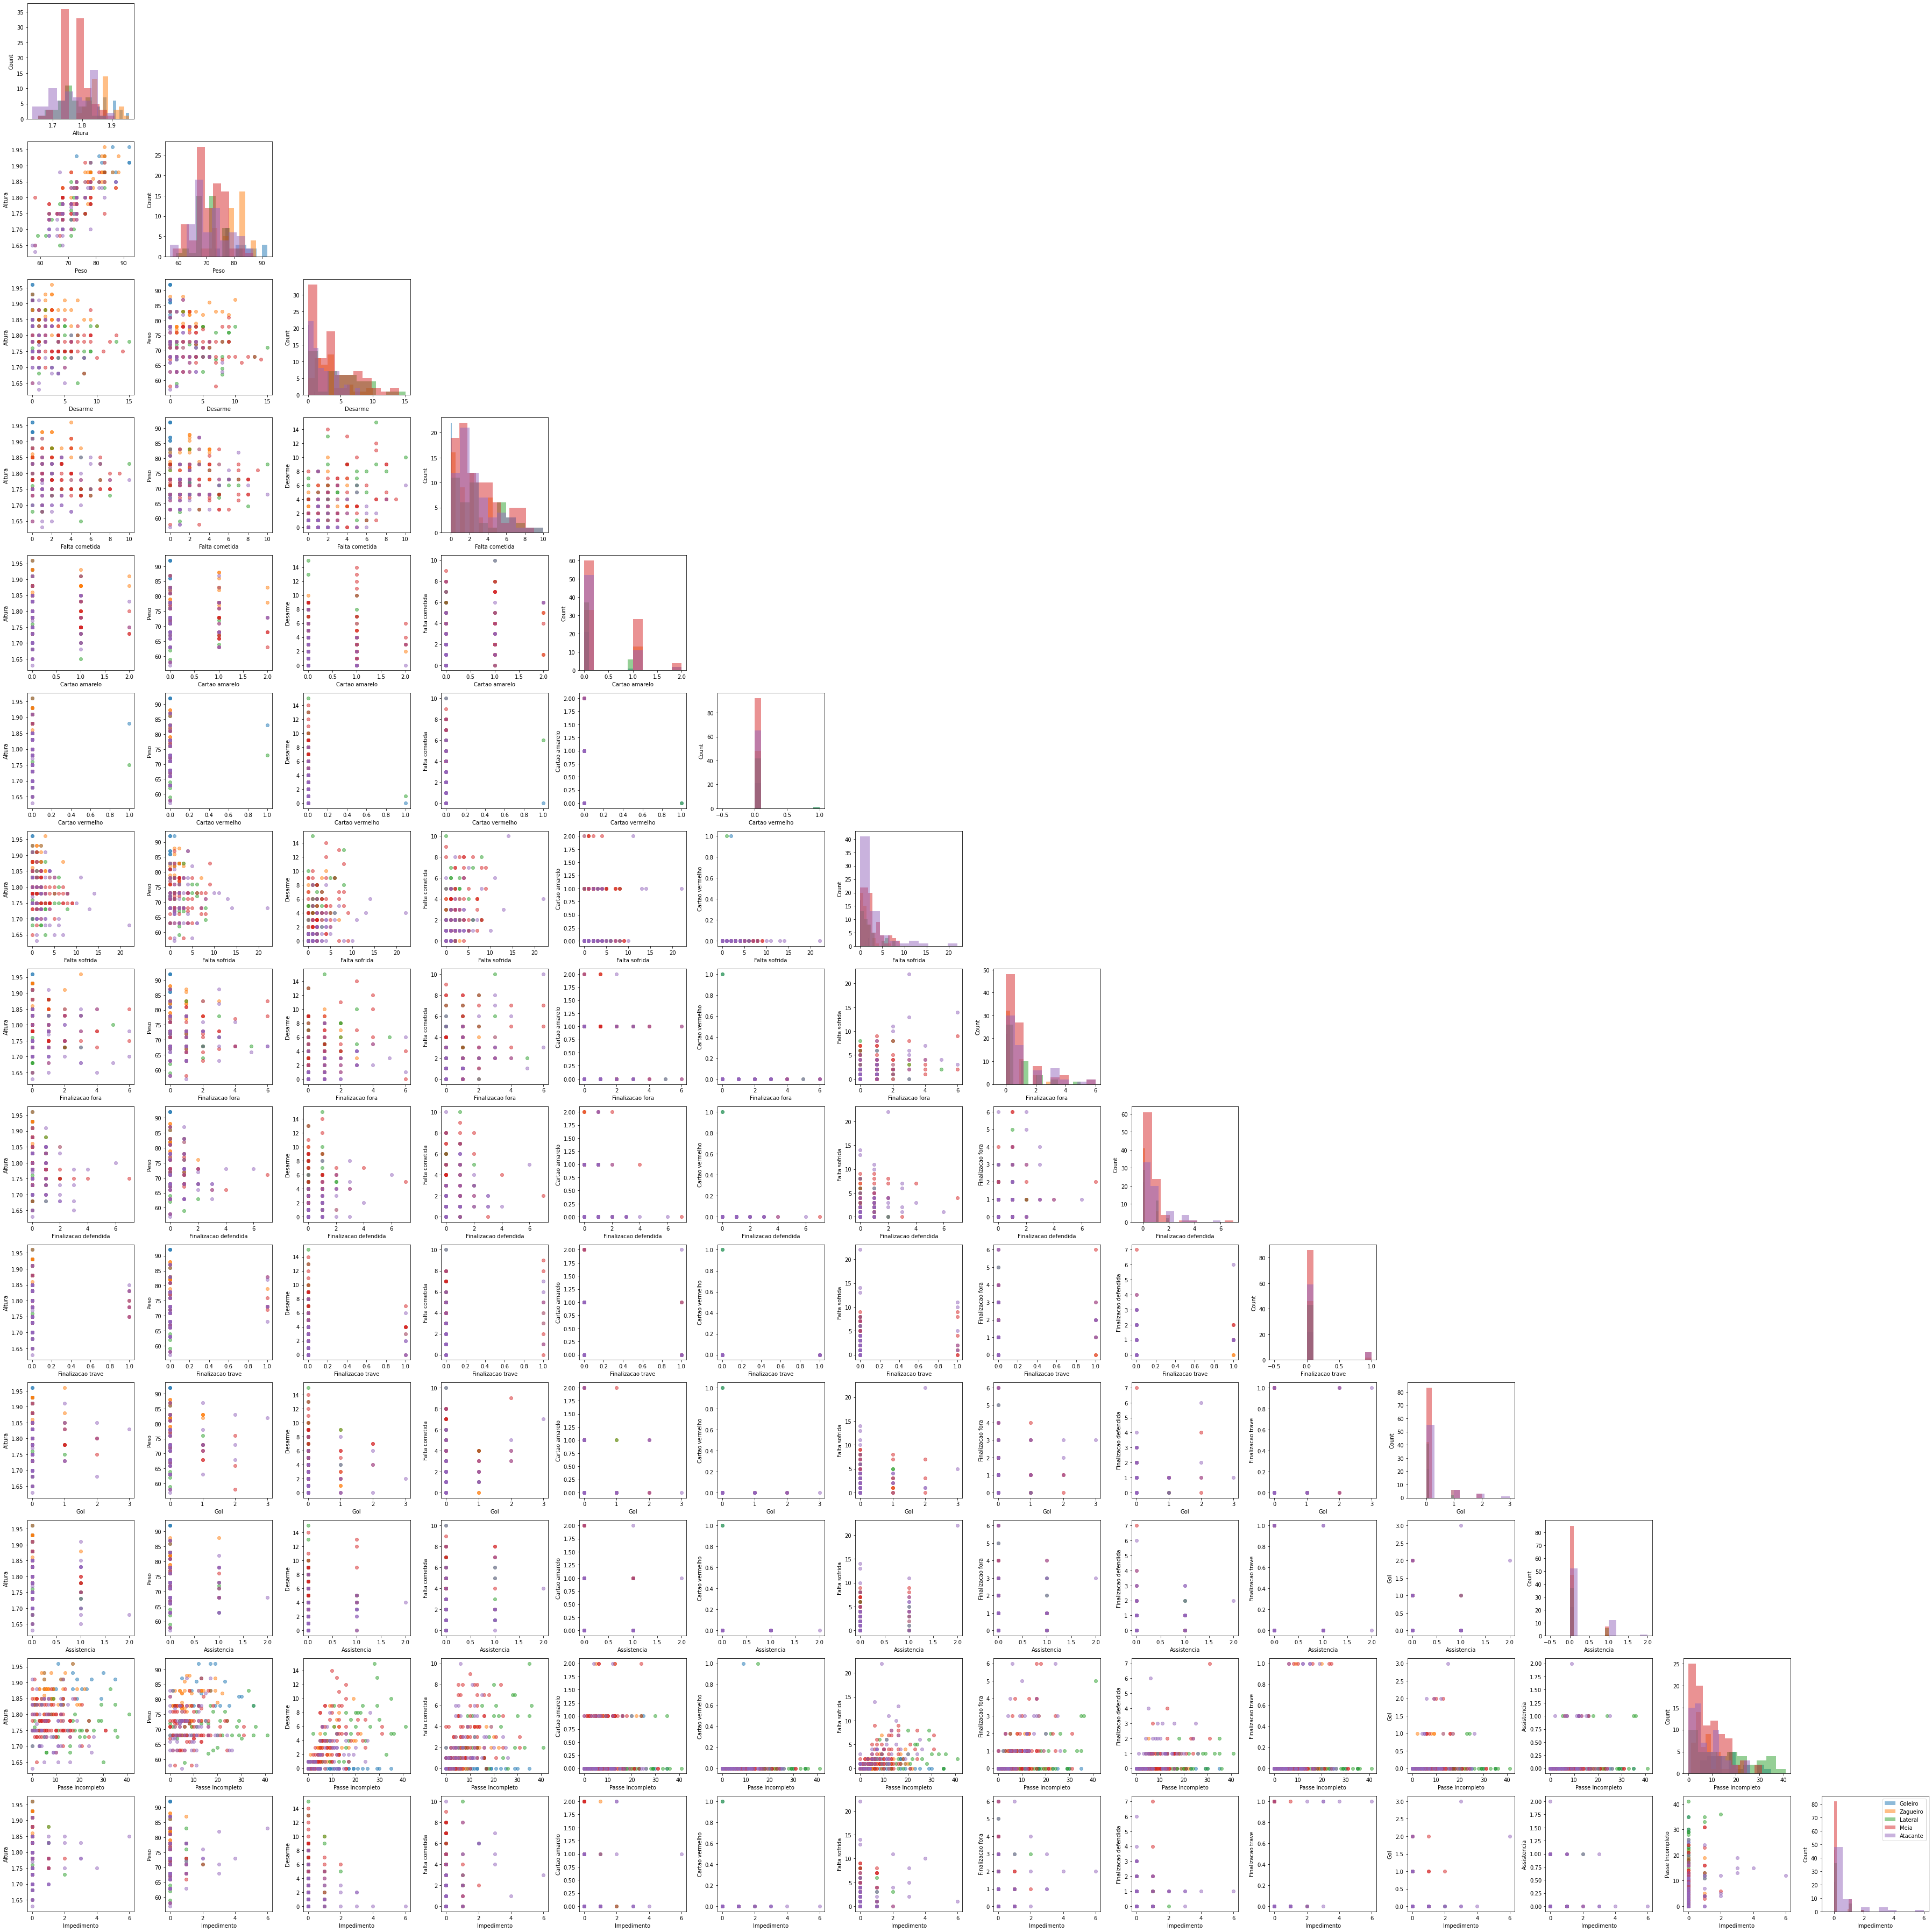

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix


fig, axes = scatterplotmatrix(X[Y==0],figsize=(50,50),alpha=0.5,names=df_jogadores.columns[:14])
fig, axes = scatterplotmatrix(X[Y==1],fig_axes=(fig,axes),alpha=0.5,names=df_jogadores.columns[:14])
fig, axes = scatterplotmatrix(X[Y==2],fig_axes=(fig,axes),alpha=0.5,names=df_jogadores.columns[:14])
fig, axes = scatterplotmatrix(X[Y==3],fig_axes=(fig,axes),alpha=0.5,names=df_jogadores.columns[:14])
fig, axes = scatterplotmatrix(X[Y==4],fig_axes=(fig,axes),alpha=0.5,names=df_jogadores.columns[:14])

plt.tight_layout()
plt.legend(labels=["Goleiro","Zagueiro","Lateral","Meia","Atacante"])
plt.savefig("Covariance_.JPEG")
plt.show()